In [1]:
%matplotlib inline

In [2]:
import os
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

import skimage
import skimage.io
import skimage.measure
import skimage.morphology

import evaluation

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Load annotations from observer 1

In [3]:
gt_path = "/storage/data/DSB2018/phase-2-gt/"
annotator_one_identifiers = [
    "490f89e7686409fa6ef0320ab41a67809bd4ddb0e44215ce31496e58d73bbb1e",
    "3cf9fca25090c2c1b75efb4bdfdc99a25ee3cf007bbf3d6a9d9c5c68c3438984",
    "33d6d8e9d74f9da9679000a6cf551fffe4ad45af7d9679e199c5c4bd2d1e0741",
    "8b80aca225c1dd0aa5637229f0e0bec0dbd7b5313b462effd768da2bb5a56a06",
    "8ac1bb51234d469a09daab42b8cf7526431bdefb71a6673815816324921bfdf6"
]

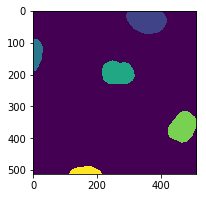

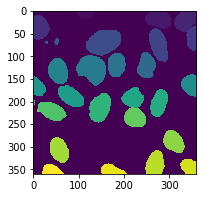

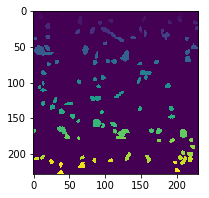

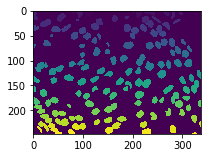

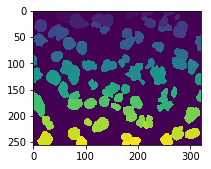

In [4]:
annotations_one = []
for image_name in annotator_one_identifiers:    
    img_filename = os.path.join(gt_path, image_name + ".png")
    ground_truth = skimage.io.imread(img_filename)
    annotations_one.append(ground_truth)
    plt.figure(figsize=(3,3))
    plt.imshow(ground_truth)

# Load annotations from observer 2

/home/jccaicedo/.local/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


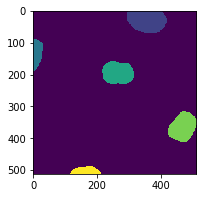

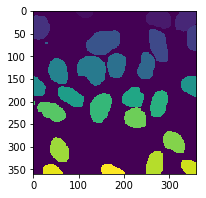

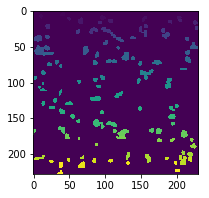

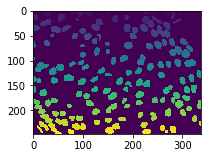

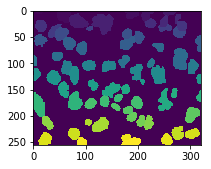

In [5]:
annotator_two_paths = ["annotator-v2/" + x for x in os.listdir("annotator-v2/") if x.endswith("png")]

annotations_two = []
for k in annotator_two_paths:
    im = skimage.io.imread(k)   
    gray = skimage.img_as_uint(skimage.color.rgb2gray(im))
    labels = skimage.measure.label(gray)
    annotations_two.append(labels)
    
    plt.figure(figsize=(3,3))
    plt.imshow(labels)

# Load top competitor results

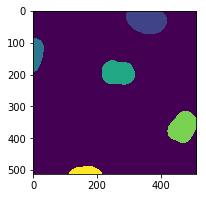

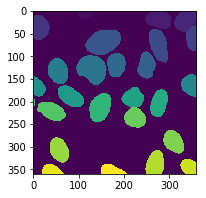

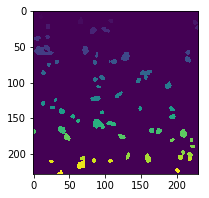

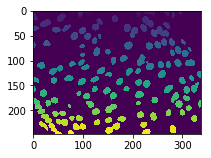

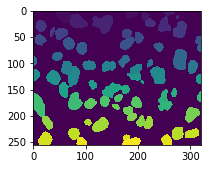

In [6]:
top_model = []
path = "/storage/data/DSB2018/"
submission = "7193229"
for f in annotator_one_identifiers:
    im = skimage.io.imread(path + "phase-2-predictions/" + submission + "-" + f + ".png")
    top_model.append(im)
    plt.figure(figsize=(3,3))
    plt.imshow(im)

# CellProfiler

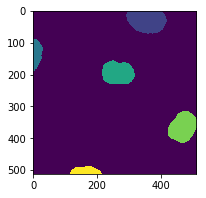

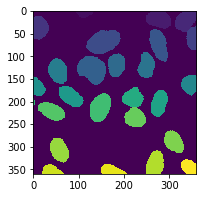

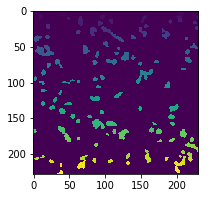

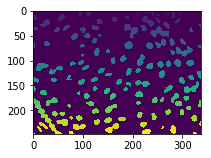

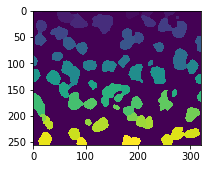

In [7]:
cellprofiler = []
path = "/storage/data/DSB2018/CP_segmentations/all/"
submission = "cellprofiler"
for f in annotator_one_identifiers:
    im = skimage.io.imread(path + "/" + submission + "-" + f + ".tiff")
    cellprofiler.append(im)
    plt.figure(figsize=(3,3))
    plt.imshow(im)

# Original images

/home/jccaicedo/.local/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


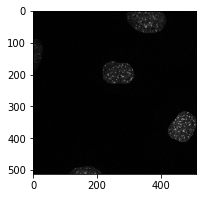

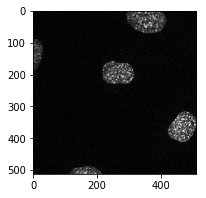

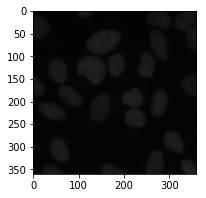

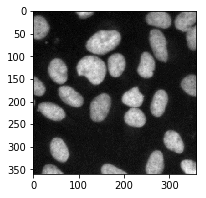

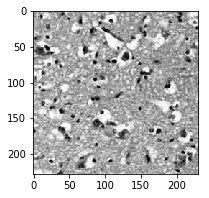

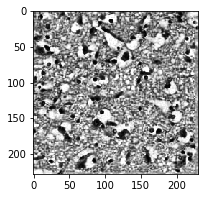

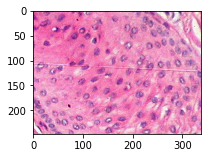

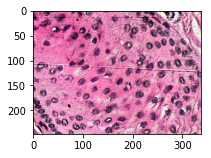

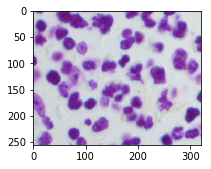

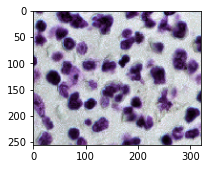

In [8]:
path = "/storage/data/DSB2018/phase-2-imgs/"
for f in annotator_one_identifiers:
    im = skimage.io.imread(path + "/" + f + ".png")
    im2 = skimage.exposure.equalize_adapthist(im)
    if len(im.shape) == 3:
        plt.figure(figsize=(3,3))
        plt.imshow(im) 
        plt.figure(figsize=(3,3))
        plt.imshow(im2) 
    else:
        plt.figure(figsize=(3,3))
        plt.imshow(im, cmap="gray")
        plt.figure(figsize=(3,3))
        plt.imshow(im2, cmap="gray")
    

# Evaluate agreement

In [9]:
palette=["xkcd:azure", "xkcd:gray", "xkcd:green", "violet", "xkcd:violet", "xkcd:black"]

# Compute max(IoU) scores for all objects.
# Rows in the IoU matrix are ground truth objects and columns are predicted objects.
# We take the maximum along the columns, so for each ground truth object we keep the best prediction.
def iou_analysis(annotations_one, annotations_two, annotator_one_identifiers, display=False):
    objects_iou = pd.DataFrame(columns=["Image","IoU"])

    for k in range(len(annotations_one)):
        iou = evaluation.intersection_over_union(annotations_one[k], annotations_two[k])
        values = np.max(iou, axis=1)
        for v in values: 
            objects_iou = objects_iou.append({"Image":annotator_one_identifiers[k],"IoU":v}, ignore_index=True)

        if display:
            print(annotator_one_identifiers[k],"\n", evaluation.measures_at(0.7, iou))
            plt.figure(figsize=(4,4))
            plt.imshow((annotations_one[k] > 0)/1. - (annotations_two[k] > 0)/1.,cmap="bwr")
            plt.show()
    if display:
        sb.swarmplot(data=objects_iou, x="Image", y="IoU", palette=palette)
    return objects_iou

490f89e7686409fa6ef0320ab41a67809bd4ddb0e44215ce31496e58d73bbb1e 
 (0.9999999999, 5, 0, 0, 0.9999999998, 0.9999999998, 0.9999999998)


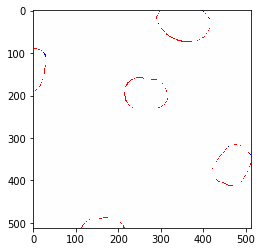

3cf9fca25090c2c1b75efb4bdfdc99a25ee3cf007bbf3d6a9d9c5c68c3438984 
 (0.892857142841199, 25, 2, 4, 0.8064516128772112, 0.9259259258916324, 0.8620689654875149)


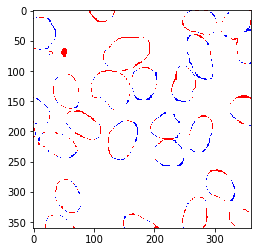

33d6d8e9d74f9da9679000a6cf551fffe4ad45af7d9679e199c5c4bd2d1e0741 
 (0.6804979253083797, 82, 51, 26, 0.515723270437008, 0.6165413533788231, 0.759259259252229)


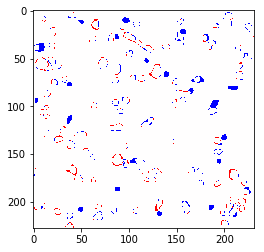

8b80aca225c1dd0aa5637229f0e0bec0dbd7b5313b462effd768da2bb5a56a06 
 (0.7454545454522865, 123, 49, 35, 0.5942028985478541, 0.7151162790656098, 0.7784810126533008)


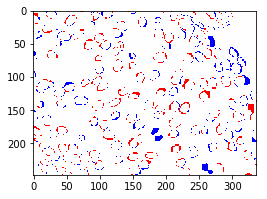

8ac1bb51234d469a09daab42b8cf7526431bdefb71a6673815816324921bfdf6 
 (0.7051282051236851, 55, 22, 24, 0.5445544554401529, 0.7142857142764378, 0.6962025316367569)


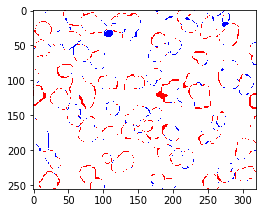

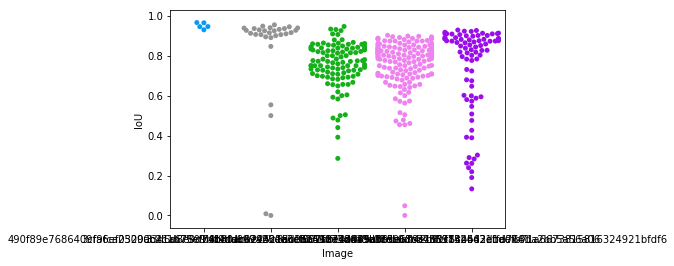

In [10]:
objects_iou_1v2 = iou_analysis(annotations_one, annotations_two, annotator_one_identifiers, display=True)
objects_iou_1v2["Comparing"] = "a)1_vs_2"

In [11]:
objects_iou_2v1 = iou_analysis(annotations_two, annotations_one, annotator_one_identifiers)
objects_iou_2v1["Comparing"] = "b)2_vs_1"

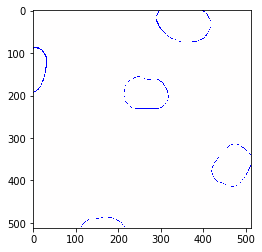

In [12]:
x = (annotations_one[0] > 0)/1. - (top_model[0] > 0)/1.
x[0,0] = 1.0
plt.imshow(x,cmap="bwr")

490f89e7686409fa6ef0320ab41a67809bd4ddb0e44215ce31496e58d73bbb1e 
 (0.9999999999, 5, 0, 0, 0.9999999998, 0.9999999998, 0.9999999998)


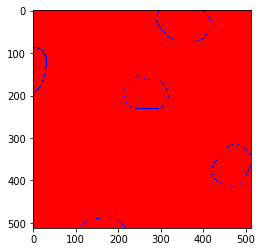

3cf9fca25090c2c1b75efb4bdfdc99a25ee3cf007bbf3d6a9d9c5c68c3438984 
 (0.9454545454373554, 26, 0, 3, 0.8965517241070154, 0.9999999999615384, 0.8965517241070154)


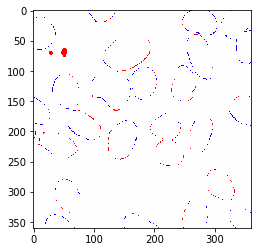

33d6d8e9d74f9da9679000a6cf551fffe4ad45af7d9679e199c5c4bd2d1e0741 
 (0.5568181818150181, 49, 19, 59, 0.3858267716505053, 0.7205882352835207, 0.45370370369950275)


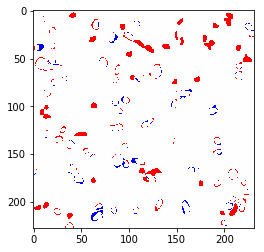

8b80aca225c1dd0aa5637229f0e0bec0dbd7b5313b462effd768da2bb5a56a06 
 (0.8561872909670362, 128, 13, 30, 0.7485380116915291, 0.9078014184332781, 0.8101265822733537)


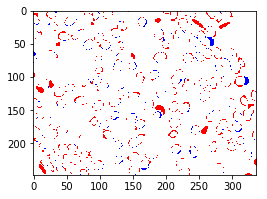

8ac1bb51234d469a09daab42b8cf7526431bdefb71a6673815816324921bfdf6 
 (0.6447368421010216, 49, 24, 30, 0.4757281553351871, 0.6712328767031338, 0.6202531645491107)


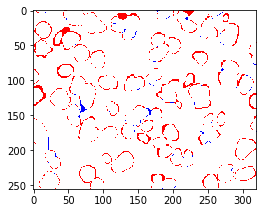

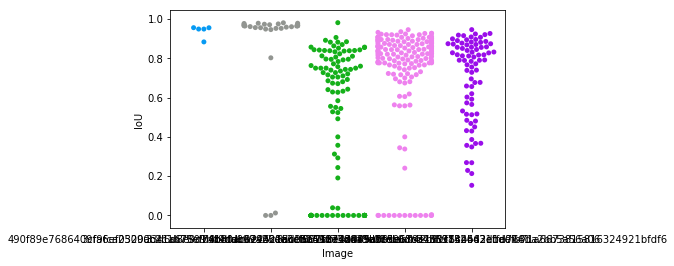

In [13]:
objects_iou_1vm = iou_analysis(annotations_one, top_model, annotator_one_identifiers, display=True)
objects_iou_1vm["Comparing"] = "c)1_vs_model"

In [14]:
objects_iou_mv1 = iou_analysis(top_model, annotations_one, annotator_one_identifiers)
objects_iou_mv1["Comparing"] = "d)model_vs_1"

In [15]:
objects_iou_2vm = iou_analysis(annotations_two, top_model, annotator_one_identifiers)
objects_iou_2vm["Comparing"] = "e)2_vs_model"

In [16]:
objects_iou_mv2 = iou_analysis(top_model, annotations_two, annotator_one_identifiers)
objects_iou_mv2["Comparing"] = "f)model_vs_2"

In [17]:
objects_iou_cpv1= iou_analysis(cellprofiler, annotations_one, annotator_one_identifiers)
objects_iou_cpv1["Comparing"] = "g)cp_vs_1"

490f89e7686409fa6ef0320ab41a67809bd4ddb0e44215ce31496e58d73bbb1e 
 (0.9999999999, 5, 0, 0, 0.9999999998, 0.9999999998, 0.9999999998)


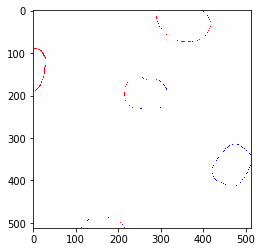

3cf9fca25090c2c1b75efb4bdfdc99a25ee3cf007bbf3d6a9d9c5c68c3438984 
 (0.9454545454373554, 26, 0, 3, 0.8965517241070154, 0.9999999999615384, 0.8965517241070154)


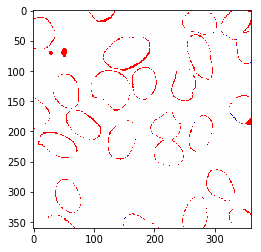

33d6d8e9d74f9da9679000a6cf551fffe4ad45af7d9679e199c5c4bd2d1e0741 
 (0.45161290322398545, 56, 84, 52, 0.29166666666514757, 0.39999999999714286, 0.5185185185137174)


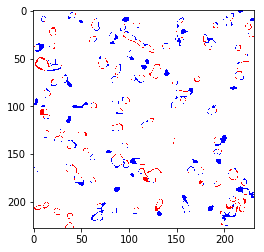

8b80aca225c1dd0aa5637229f0e0bec0dbd7b5313b462effd768da2bb5a56a06 
 (0.3949044585974685, 62, 94, 96, 0.24603174603076972, 0.3974358974333498, 0.3924050632886557)


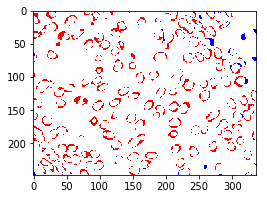

8ac1bb51234d469a09daab42b8cf7526431bdefb71a6673815816324921bfdf6 
 (0.5571428571388776, 39, 22, 40, 0.386138613857563, 0.639344262284601, 0.49367088606970033)


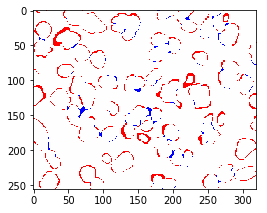

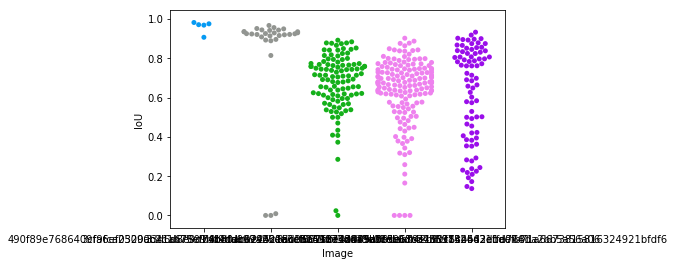

In [18]:
objects_iou_1vcp= iou_analysis(annotations_one, cellprofiler, annotator_one_identifiers, display=True)
objects_iou_1vcp["Comparing"] = "h)1_vs_cp"

In [19]:
objects_iou_cpv2= iou_analysis(cellprofiler, annotations_two, annotator_one_identifiers)
objects_iou_cpv2["Comparing"] = "i)cp_vs_2"

In [20]:
objects_iou_2vcp= iou_analysis(annotations_two, cellprofiler, annotator_one_identifiers)
objects_iou_2vcp["Comparing"] = "k)2_vs_cp"

,Comparing,IoU
0,a)1_vs_2,0.806250
1,c)1_vs_model,0.822253
2,e)2_vs_model,0.821251
3,h)1_vs_cp,0.704028
4,k)2_vs_cp,0.712644


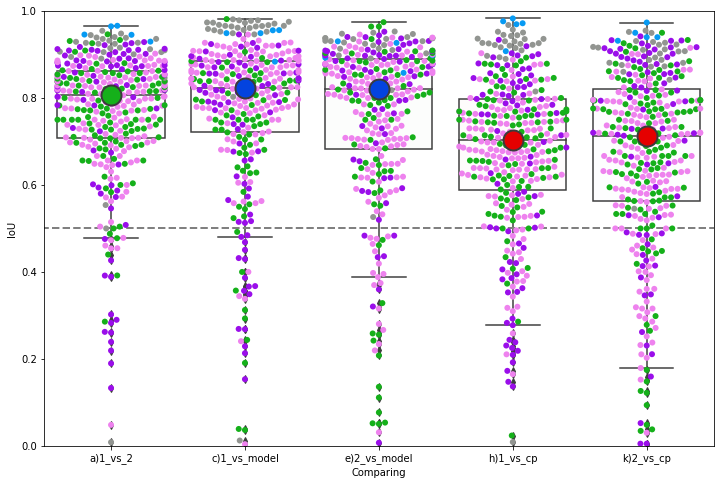

In [21]:
all_iou = pd.concat([
    objects_iou_1v2, 
    #objects_iou_2v1,
    objects_iou_1vm, 
    #objects_iou_mv1,
    objects_iou_2vm, 
    #objects_iou_mv2,
    #objects_iou_cpv1,
    objects_iou_1vcp,
    #objects_iou_cpv2,
    objects_iou_2vcp,
])
plt.figure(figsize=(12,8))
ax_s = sb.swarmplot(data=all_iou[all_iou.IoU > 0], x="Comparing", y="IoU", hue="Image", 
                  palette=palette, size=6, linewidth=0)
ax_s.legend_.remove()
ax_s.set_ylim(0,1)

ax_b = sb.boxplot(data=all_iou[all_iou.IoU > 0], x="Comparing", y="IoU")
for patch in ax_b.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .01))
    
means = all_iou[all_iou.IoU > 0].groupby(["Comparing"]).median().reset_index()
ax_p = sb.swarmplot(data=means,
                    x="Comparing", y="IoU", size=20, linewidth=2,
                    palette=["xkcd:green", "xkcd:blue", "xkcd:blue", "xkcd:red", "xkcd:red"])

plt.plot([-1,10],[0.5,0.5], color="gray", linestyle="--", linewidth=2)
means

In [22]:
def agreement(a1, a2, ids, title=""):
    accuracy = pd.DataFrame(columns=["Image", "Threshold", "F1", "Jaccard", "TP", "FP", "FN", "Official_Score", "Precision", "Recall"])
    for k in range(len(a1)):
        evaluation.compute_af1_results(a1[k], a2[k], accuracy, ids[k])
    average_results = accuracy.groupby("Image").mean().mean()
    results_at_07 = accuracy[accuracy["Threshold"].round(2) == 0.7].mean()
    print(title+":", average_results["F1"],average_results["Jaccard"],results_at_07["F1"])

In [23]:
print("\t\tAverage F1\t\tJaccard Index\t\tF1@0.7")
agreement(annotations_one, annotations_two, annotator_one_identifiers, "One vs Two")
agreement(annotations_one, top_model, annotator_one_identifiers, "One vs Model")
agreement(annotations_one, cellprofiler, annotator_one_identifiers, "One vs CP")
print()
agreement(annotations_two, annotations_one, annotator_one_identifiers, "Two vs One")
agreement(annotations_two, top_model, annotator_one_identifiers, "Two vs Model")
agreement(annotations_two, cellprofiler, annotator_one_identifiers, "Two vs CP")
print()
agreement(top_model, annotations_one, annotator_one_identifiers, "Model vs One")
agreement(top_model, annotations_two, annotator_one_identifiers, "Model vs Two")
agreement(top_model, cellprofiler, annotator_one_identifiers, "Model vs CP")

		Average F1		Jaccard Index		F1@0.7
One vs Two: 0.6748559324261391 0.7766778505629912 0.8047875637251101
One vs Model: 0.6867607175199612 0.8387058918257756 0.8006393720440862
One vs CP: 0.6029221846334839 0.7538340321762232 0.6698229528595373

Two vs One: 0.6748559324261391 0.8051684015482927 0.8047875637251101
Two vs Model: 0.648372662436245 0.8273062648957967 0.7683570860853751
Two vs CP: 0.6010634321865408 0.7663079117263043 0.6933428743117875

Model vs One: 0.6867607175199612 0.7434635919676159 0.8006393720440862
Model vs Two: 0.648372662436245 0.712086829147438 0.7683570860853751
Model vs CP: 0.6421810604868976 0.7342501682107423 0.7706534344335824


In [25]:
objects_iou_1v2.shape, objects_iou_2v1.shape

((379, 3), (414, 3))